# 0 - Interpréter quelques statistiques

Dans les derniers chapitres, on a calculé la moyenne, l'écart-type et la variance de données, sans trop se pencher sur comment interpréter ça.

La **moyenne** est une mesure de la **tendence centrale** des données. Les données sont réparties autour de quelle valeur? Quel est le "centre" des données?

L'**écart-type** et la **variance** sont deux mesures différentes de la même chose. Ça mesure la **dispersion** des données : à quel point les données sont éloignées ou rapprochées du centre? (ie, éloignées ou rapprochées de la moyenne)

&nbsp;

Commençons par ré-afficher un `.describe()` des données de fleurs `iris` :

In [9]:
#@title Importations

import numpy as np
import pandas as pd
import plotly.express as px

In [10]:
#@title Jeu de données iris (déjà prêt à être utilisé, pas de valeurs manquantes ni d'erreurs)
iris = pd.read_csv("https://raw.githubusercontent.com/316k/misc-data/master/iris.csv")
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualiser la moyenne

Regardons les deux premières caractéristiques :

- **`sepal_width`** : *mean* (moyenne) = 3.04
- **`sepal_length`** :  *mean* (moyenne) = 5.88

La moyenne devrait correspondre **à la tendence centrale des données** : les données devraient être distribuées à gauche et à droite de cette valeur.

On peut le voir sur l'histogramme des deux colonnes.

Les valeurs de `sepal_width` (en $\color{red}{rouge}$) sont plus basses, centrées autour de 3.04.

Les valeurs de `sepal_length` (en $\color{blue}{bleu}$) sont plus élevées, centrées autour de 5.88.

In [11]:
#@title Visualisation des moyennes pour sepal_width et sepal_length
# NOTE: Vous voyez ici que plotly permet de produire des dessins avancés.
# Je ne vous demanderai pas d'être capables de refaire ça vous-mêmes dans un examen :-)
histogramme1 = px.histogram(iris, x="sepal_width",
                            nbins=50,
                            color_discrete_sequence=['red'])
histogramme2 = px.histogram(iris, x="sepal_length",
                            nbins=50, color_discrete_sequence=['blue'])

from plotly.graph_objects import Figure
fig = Figure(data=histogramme1.data + histogramme2.data)
fig.update_xaxes(range=[0, 10])
fig.update_yaxes(range=[0, 37])

# Ligne sur la moyenne de `sepal_width`
fig.add_vline(x=3.04, line_width=3, line_dash="dash", line_color="darkred")
# Ligne sur la moyenne de `sepal_length`
fig.add_vline(x=5.88, line_width=3, line_dash="dash", line_color="darkblue")
fig

## Visualiser l'écart-type

Les valeurs sont  :

- **`sepal_width`** : *std* (écart-type) = 0.43
- **`sepal_length`** : *std* (écart-type) = 0.82

&nbsp;

L'écart-type est une mesure de la **dispersion des données**. Plus la valeur est élevée, plus les données ont tendence à s'éparpiller loin de la moyenne.

Sur l'histogramme, on devrait donc voir que `sepal_width` est moins éparpillé horizontalement que `sepal_length`.

*Sous certaines conditions*, on peut s'attendre à ce que 95% des données soient à l'intérieur de l'intervalle

$$\text{moyenne} ± 1.96*\text{ecart-type}$$

In [12]:
#@title Visualisation de l'écart-type pour sepal_width et sepal_length
histogramme1 = px.histogram(iris, x="sepal_width",
                            nbins=50,
                            color_discrete_sequence=['red'])
histogramme2 = px.histogram(iris, x="sepal_length",
                            nbins=50, color_discrete_sequence=['blue'])

from plotly.graph_objects import Figure
fig = Figure(data=histogramme1.data + histogramme2.data)
fig.update_xaxes(range=[0, 10])
fig.update_yaxes(range=[0, 37])

# Carré rouge: centre de `sepal_width` ± 1.96*écart-type
fig.add_shape(type="rect",
        x0=3.04 - 1.96 * 0.43, x1=3.04 + 1.96 * 0.43,
        y0=0, y1=37,
        fillcolor="red", opacity=0.2)
# Carré bleu: centre de `sepal_length` ± 1.96*écart-type
fig.add_shape(
        type="rect",
        x0=5.88 - 1.96 * 0.82, x1=5.88 + 1.96 * 0.82,
        y0=0, y1=37,
        fillcolor="blue", opacity=0.2)
fig

## Variance

L'écart-type est défini comme : *la racine carrée de la variance*.

Plus la variance est grande, plus l'écart-type l'est aussi. **Ces deux valeurs sont directement reliées**.

&nbsp;

Il n'y a pas vraiment d'interprétation graphique simple de la variance, ni d'interprétation facile si on voit que la variance est de `5.218`.

C'est cependant très utile dans plusieurs contextes mathématiques.

# 1 - Analyse d'images

On va utiliser la moyenne et l'écart-type pour analyser des images.

&nbsp;

Le **jeu de données MNIST** est un ensemble d'images scannées, normalisées et étiquettées de chiffres écrits à la main.

La cellule suivante télécharge l'ensemble d'images dans votre environnement Colab.

In [13]:
!wget -c https://raw.githubusercontent.com/316k/misc-data/master/mnist-images.zip
! ( ! test -e 0-005.png ) && unzip -q mnist-images.zip

--2026-02-13 20:35:39--  https://raw.githubusercontent.com/316k/misc-data/master/mnist-images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632395 (618K) [application/zip]
Saving to: ‘mnist-images.zip’

mnist-images.zip    100%[===================>] 617.57K  --.-KB/s    in 0.03s   

2026-02-13 20:35:39 (20.1 MB/s) - ‘mnist-images.zip’ saved [632395/632395]



Une fois la cellule exécutée, ouvrez l'onglet des Fichiers dans la barre de gauche :


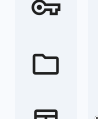

Vous devriez y voir plein d'images nommées comme suit :

- `0-000.png`, `0-001.png`, `0-002.png`, ... `0-149.png`,
- `1-000.png`, `1-001.png`, `1-002.png`, ... `1-149.png`,
- `2-000.png`, `2-001.png`, `2-002.png`, ... `2-149.png`,
- `3-000.png`, `3-001.png`, `3-002.png`, ... `3-149.png`,
- ...
- `9-000.png`, `9-001.png`, `9-002.png`, ... `9-149.png`,

Il s'agit de 150 images de chaque chiffre manuscrit, entre 0 et 9. Le chiffre contenu dans l'image est la première chose à gauche du `-`.

Par exemple, l'image numéro 20 du chiffre 3 est nommée : `3-020.png`.

In [14]:
#@title Fonctions pour lire et afficher des images

# Mêmes fonctions que ce qu'on avait dans le chapitre sur Numpy

def charger_image(url):
  import skimage.io
  img = skimage.io.imread(url).astype(float)
  img /= 255.0
  assert np.all(np.logical_and(img >= 0, img <= 1)), "Les pixels n'ont pas des valeurs de 0 à 1"
  # Conversion en noir et blanc au besoin
  if len(img.shape) == 3:
    img = img[:, :, 0:3].mean(axis=-1)
  assert len(img.shape) == 2, "L'image doit être en tons de gris"
  return img

def imshow(matrice, titre="(Image sans titre)"):
  import matplotlib.pyplot as plt
  assert np.all(np.logical_and(matrice >= 0, matrice <= 1)), "Les pixels doivent avoir des valeurs de 0 à 1"
  plt.imshow(matrice, cmap="gray", vmin=0, vmax=1)
  plt.title(titre)
  plt.show()

On peut lire une image et l'afficher avec :

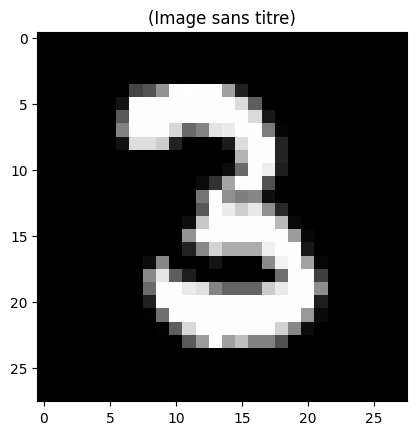

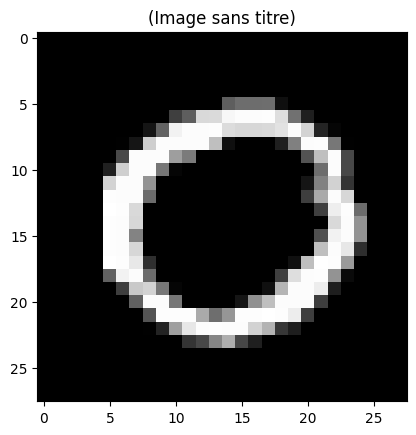

In [15]:
exemple_image_3 = charger_image('3-020.png')
exemple_image_0 = charger_image('0-131.png')

imshow(exemple_image_3)
imshow(exemple_image_0)

## Regarder l'ensemble des images

Voici un petit widget pour vous permettre d'explorer rapidement l'ensemble des images :

In [16]:
import os
from glob import glob
fnames = glob('?-*.png')
def afficher_image_mnist(i):
  img = charger_image(fnames[i])
  imshow(img, fnames[i])

from ipywidgets import interact

output = interact(afficher_image_mnist, i=(0, len(fnames)-1))

interactive(children=(IntSlider(value=749, description='i', max=1499), Output()), _dom_classes=('widget-intera…

## Carte thermique (*heatmap*)



Plotly possède une méthode très similaire au imshow() que je vous ai fourni, qui sert à afficher des données organisées en 2D en général.

Mon `imshow()` ne fonctionne qu'avec des valeurs positives, entre 0=noir et 1=blanc, mais Plotly permet d'afficher n'importe quel tableau 2D, avec une échelle de couleurs ajustée aux données.

&nbsp;

Il s'agit d'une méthode faite pour visualiser des **cartes thermiques** : ça permet de représenter avec des couleurs un ensemble de données organisées en 2D.

Comme les autres visualisations avec plotly, c'est interactif : on peut passer la souris dessus pour avoir des détails.


In [17]:
# Affichage d'une image comme une carte thermique
display(px.imshow(exemple_image_0))

# Calcul arbitraire: la table de multiplications entre 0 et 10
table_multiplication = np.zeros((10, 10))
for i in range(10):
  for j in range(10):
    table_multiplication[i, j] = i * j
print(table_multiplication)
display(px.imshow(table_multiplication, text_auto=True))

# Calcul arbitraire: une grille du jeu "démineur" (minesweeper)
from scipy.signal import convolve2d
bombes = (np.random.random((15, 15)) > 0.85).astype(int)
display(px.imshow(bombes * 9 + (1 - bombes) * convolve2d(bombes, [[1,1,1],[1,0,1],[1,1,1]])[1:-1, 1:-1], text_auto=True))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]
 [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27.]
 [ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36.]
 [ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45.]
 [ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 0.  7. 14. 21. 28. 35. 42. 49. 56. 63.]
 [ 0.  8. 16. 24. 32. 40. 48. 56. 64. 72.]
 [ 0.  9. 18. 27. 36. 45. 54. 63. 72. 81.]]


## Regarder des images dans Pandas

On peut très bien analyser ces images en considérant *la valeur de chaque pixel comme une caractéristique*.

Chaque image serait une *observation*.

La première caractéristique serait *le pixel [0, 0]*.

La deuxième caractéristique serait *le pixel [0, 1]*.

La troisième caractéristique serait *le pixel [0, 2]*.

etc


&nbsp;

On peut charger un ensemble d'images dans un `DataFrame` en *écrasant* chaque image en 1D pour en faire une seule ligne.

Chaque image a une taille d'exactement 28x28 pixels :

In [18]:
exemple_image_3.shape

(28, 28)

On peut l'écraser en 1D avec un `reshape` : on peut en faire un tableau 1D de taille 28*28=784

In [19]:
exemple_image_3.reshape(784)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Pour charger les images dans un `DataFrame`, on doit les lire une à la fois :

```
pour chaque chiffre 0 à 9 (inclus)
    pour chaque numéro d'image de 0 à 150 (exclus)
      charger l'image pour l'écraser
```

Les 150 premières lignes devraient toutes être des zéros. Les 150 suivantes devraient toutes êtres des 1, etc.

In [20]:
#@title Lecture des images et création du DataFrame
lignes = []

for chiffre in range(10):
  for numero in range(150):
    fichier = str(chiffre) + "-" + str(numero).zfill(3) + ".png"
    image = charger_image(fichier)
    image1D = image.reshape(784)
    lignes.append(image1D)

df_mnist = pd.DataFrame(lignes)
display(df_mnist)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Manipuler ça avec Pandas

Comme d'habitude, c'est bon de commencer par afficher un `describe()` des données :

In [21]:
df_mnist.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1500.000000,1500.000000,1500.000000,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000544,0.000397,0.000112,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020660,0.014135,0.004354,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.800000,0.545098,0.168627,0.0,0.0,0.0,0.0,0.0,0.0,0.0


À 784 caractéristiques, c'est malheureusement trop gros pour tout voir...

**Exercice**

Combien y a-t-il de pixels dont la valeur est > 0.05 dans la première image?

In [57]:
#@title Exercice 1
premiere_image = df_mnist.loc[0]
print("Nombre de pixels > 0.05:", premiere_image[premiere_image > 0.05].size)

Nombre de pixels > 0.05: 221


## Coordonnées dans l'image 1D

Quand l'image en 2D se fait écraser en 1D, c'est comme si ses lignes (horizontales) étaient mises côte-à-côte une à la suite de l'autre.

Puisque le format original des images était 28x28, on a:

```
    index1D = y * 28 + x
```

&nbsp;

Les caractéristiques qui sont toutes à zéro dans notre DataFrame, ça correspond donc :

- De 0 à 9 : le début de la première ligne (y=0)
- De 777 à 783: la fin de la dernière ligne (y=27)

&nbsp;

On peut au moins remarquer dans le `.describe()` plus haut : les quelques premières colonnes et les quelques dernières colonnes sont toutes à zéro (min = max = 0).

Ça nous dit que les pixels sur les rebords haut/bas de l'image sont toujours à 0 dans toutes les images.

**Exercice**

Affichez un histogramme des valeurs possibles pour le pixel (y=12, x=16), soit celui-ci :

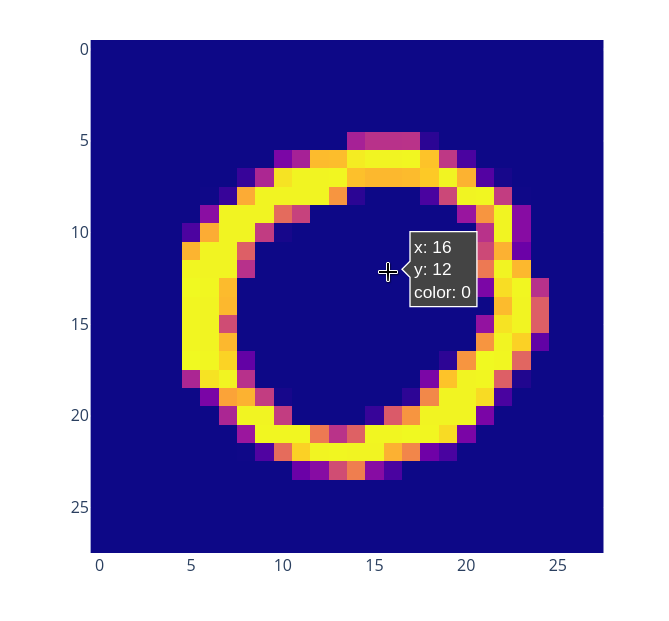

A) Pour l'ensemble des images (tous les exemples de chiffres confonus)

B) Seulement pour les images **du chiffre zéro**, soient les 150 premières images du `DataFrame` (utilisez `.loc[0:149]`)

In [59]:
#@title Exercice 2 A)
index1D = 12 * 28 + 16
px.histogram(df_mnist[index1D])

In [51]:
#@title Exercice 2 B)
px.histogram(df_mnist[index1D].loc[0:149])

**QUESTION**

Observez les deux histogrammes : qu'est-ce qu'on peut remarquer pour les zéros vs l'ensemble des images?

**RÉPONSE**

Le pixel (y=12, x=16) est presque toujours à zéro quand notre chiffre est un 0.

C'est un peu mieux réparti pour l'ensemble du jeu de données.

## Retransformer une ligne du DataFrame en image 2D

La conversion `ligne pandas`/`tableau 2D numpy` peut aller dans les deux sens.

On peut extraire des morceaux de `DataFrame` et les convertir au format Numpy avec la méthode `.to_numpy()`. Rendu dans numpy, on peut utiliser `reshape()` pour réobtenir une image 2D.

&nbsp;

Par exemple, on pourrait extraire la ligne #381 et l'afficher :

In [60]:
ligne = df_mnist.loc[381]
tableau2D = ligne.to_numpy().reshape(28, 28)

px.imshow(tableau2D)

On peut faire ça avec n'importe quelle ligne de `DataFrame`, ou encore avec n'importe quelle `Series` de taille 784

## Exercice

De quoi a l'air l'image moyenne de tous les chiffres?

Affichez visuellement la moyenne de chaque pixel sous forme de carte thermique, pour l'ensemble du jeu de données.

In [61]:
#@title Exercice 3

### Utilisez le DataFrame pour calculer la moyenne de chaque colonne
moyenne_par_colonne = df_mnist.mean()

### Cette moyenne est une Series. Convertissez-la au format numpy, puis
### affichez-la comme une carte thermique avec Plotly
image_moyenne = moyenne_par_colonne.to_numpy().reshape((28, 28))
px.imshow(image_moyenne)

**Question**

Sachant que le `DataFrame` contient 150 images de chaque chiffre, avec

- `[0, 149]` => images de 0
- `[150, 299]` => images de 1
- `[300, 449]` => images de 2
- `[450, 599]` => images de 3
- ...

De quoi a l'air l'image moyenne du chiffre 2?

In [24]:
#@title Exercice 4
deux_seulement = df_mnist.loc[300:449]
deux_seulement_moyenne = deux_seulement.mean()
image_moyenne = deux_seulement_moyenne.to_numpy().reshape((28, 28))
px.imshow(image_moyenne)

**Question**

Généralisez votre logique : écrivez une fonction qui prend en paramètre le chiffre désiré et qui retourne l'image moyenne.

Faites une boucle sur les chiffres de 0 à 9 pour afficher l'image moyenne de chaque chiffre

In [25]:
#@title Exercice 5

def image_moyenne(chiffre):
  return ...

##########

def image_moyenne(chiffre):
  index_depart = chiffre * 150
  index_fin = (chiffre + 1) * 150 - 1
  chiffre_seulement = df_mnist.loc[index_depart:index_fin]
  chiffre_seulement_moyenne = chiffre_seulement.mean()
  image_moyenne = chiffre_seulement_moyenne.to_numpy().reshape((28, 28))
  return image_moyenne

##### tests
for i in range(10):
  display(px.imshow(image_moyenne(i), title='Image moyenne du chiffre ' + str(i)))

## Écart-type

L'écart-type est une mesure de la *dispersion* des données.

Un écart-type proche de zéro implique que toutes les données sont très proches de la moyenne. Un écart-type élevé implique que les données sont éparpillées plus loin.

Affichez visuellement l'écart-type de chaque pixel sous forme de carte thermique, pour l'ensemble du jeu de données.

In [26]:
#@title Exercice 6
image_ecart_type = df_mnist.std().to_numpy().reshape((28, 28))
display(px.imshow(image_ecart_type))

On va identifier les pixels intéressants vs les pixels peu intéressants.

On va identifier la zone dans laquelle il peut y avoir des traits de crayon.

&nbsp;

Repartez du dernier résultat et créez une image qui contient :

- 0 si l'écart-type du pixel est sous 0.05
- 1 sinon

Affichez le résultat

In [62]:
#@title Exercice 7
image_ecart_type = df_mnist.std().to_numpy().reshape((28, 28))

image_ecart_type[image_ecart_type < 0.05] = 0
image_ecart_type[image_ecart_type >= 0.05] = 1

display(px.imshow(image_ecart_type))

## Extraire des informations

Créez un nouveau `DataFrame` `df_mnist_infos`.

Chaque ligne de `df_mnist_infos` va correspondre à une image de `df_mnist`, et va contenir seulement 2 colonnes :

- `nb_pixels_touches` : le nombre de pixels touchés par le trait de crayon, soient ceux dont la valeur est supérieure à 0.05
- `etiquette` : l'étiquette de l'image, soit le chiffre qui a été dessiné


In [63]:
#@title Exercice 8

nb_pixels_touches = []
etiquette = []

for idx, ligne in df_mnist.iterrows():
  nb_pixels_touches.append(ligne[ligne > 0.05].size)

  somme_verticale = ligne.to_numpy().reshape(28, 28).sum(axis=0)
  somme_horizontale = ligne.to_numpy().reshape(28, 28).sum(axis=1)

  etiquette.append(idx//150)

df_mnist_infos = pd.DataFrame({
    "nb_pixels_touches": nb_pixels_touches,
    "etiquette": etiquette,
})
df_mnist_infos

,nb_pixels_touches,etiquette
0,221,0
1,236,0
2,158,0
3,252,0
4,176,0
...,...,...
1495,93,9
1496,169,9
1497,149,9
1498,140,9


On va s'intéresser seulement aux images des chiffres 0, 1 et 5. Faites un nouveau `DataFrame` nommé `df_mnist_infos_015` qui contient seulement ces lignes.

Essayez d'utiliser la méthode suivante de Pandas :

In [64]:
valeurs_cherchees = [3, 5]

df = pd.DataFrame([
#   a  b
   [5, 2],
   [1, 4],
   [6, 9],
   [8, 7],
   [3, 2],
   [5, 1],
   [7, 2],
], columns=['a', 'b'])

df[df.a.isin(valeurs_cherchees)] # On cherche toutes les lignes dont la valeur de a est à 3

,a,b
0,5,2
4,3,2
5,5,1


In [65]:
#@title Exercice 9

df_mnist_infos_015 = df_mnist_infos[df_mnist_infos.etiquette.isin([0, 1, 5])]
df_mnist_infos_015

,nb_pixels_touches,etiquette
0,221,0
1,236,0
2,158,0
3,252,0
4,176,0
...,...,...
895,145,5
896,117,5
897,148,5
898,123,5


**QUESTION**

Est-ce que le nombre de pixels touchés par le trait de crayon est une information suffisante pour distinguer ces trois chiffres?

&nbsp;

On pourrait s'intéresser aux propriétés de la moyenne et de l'écart-type pour regarder ça.

On va regarder la moyenne et l'écart-type de `nb_pixels_touches` pour définir un intervalle dans lequel ça devrait tomber selon quel chiffre a été tracé.

&nbsp;

Supposant que 95% des données devraient être contenues dans (moyenne ± 1.96*écart-type), définissez la plage laquelle 95% des `nb_pixels_touches` devraient tomber selon si on a  :

- Des images de 0
- Des images de 1
- Des images de 5

&nbsp;

Faites une boucle qui affiche pour chacun de ces trois chiffres:

- La moyenne des `nb_pixels_touches`
- L'écart-type des `nb_pixels_touches`
- La valeur de début de 95% des données
- La valeur de fin de 95% des données

In [66]:
#@title Exercice 10
for chiffre in [0, 1, 5]:
  chiffre_seulement = df_mnist_infos_015[df_mnist_infos_015.etiquette == chiffre]
  moyenne = chiffre_seulement.nb_pixels_touches.mean()
  ecart_type = chiffre_seulement.nb_pixels_touches.std()
  debut_95_pourcent = moyenne - 1.96 * ecart_type
  fin_95_pourcent = moyenne + 1.96 * ecart_type
  print("=== Chiffre", chiffre, "===")
  print("Moyenne:", moyenne)
  print("Écart-type:", ecart_type)
  print("Vraie plage (min, max):", round(chiffre_seulement.nb_pixels_touches.min()), round(chiffre_seulement.nb_pixels_touches.max()))
  print("Plage estimée de 95% des données:", round(debut_95_pourcent), "à", round(fin_95_pourcent))

=== Chiffre 0 ===
Moyenne: 182.54666666666665
Écart-type: 34.14037084889711
Vraie plage (min, max): 111 283
Plage estimée de 95% des données: 116 à 249
=== Chiffre 1 ===
Moyenne: 81.23333333333333
Écart-type: 17.89620208918647
Vraie plage (min, max): 46 143
Plage estimée de 95% des données: 46 à 116
=== Chiffre 5 ===
Moyenne: 148.0
Écart-type: 34.10859089957195
Vraie plage (min, max): 78 252
Plage estimée de 95% des données: 81 à 215


**QUESTION**

Avec ces données, seulement en regardant le nombre de pixels touchés, peut-on distinguer dans la **majorité des cas** :

- Un dessin de 0 d'un dessin de 1?
- Un dessin de 1 d'un dessin de 5?
- Un dessin de 0 d'un dessin de 5?

(Je ne demande pas si on peut distinguer correctement 100% des images, mais bien la grande majorité)

**RÉPONSE**

- Pour les 0, `nb_pixels_touches` va de 116 à 249
- Pour les 1, `nb_pixels_touches` va de 46 à 116
- Pour les 5, `nb_pixels_touches` va de 81 à 215

Dans la majorité des cas, regarder `nb_pixels_touches` est suffisant pour distinguer un 0 d'un 1.

Les images de 5 ne peuvent pas aussi facilement être distinguées.

Une fois votre réponse donnée, exécutez la cellule suivante pour voir la distribution des données.

Confirmez votre réponse en affichant un histogramme du nombre de pixels touchés en fonction de l'étiquette

In [67]:
px.histogram(df_mnist_infos_015, x='nb_pixels_touches', barmode="overlay", color='etiquette', range_x=[0, 300], range_y=[0, 40])

**QUESTION**

Si 95% des données sont contenues dans (moyenne ± 1.96*écart-type), ça nous laisse un bon 5% de données aux extrémités.

Pour les chiffres 1, affichez toutes les images qui sont hors de ce 95%, soient :

- Les images dont le nombre de pixels touchés est très faible (plus petit que moyenne-1.96*ecart_type)
- Les images dont le nombre de pixels touchés est très élevé (plus grand que moyenne-1.96*ecart_type)

In [68]:
#@title Exercice 11
### Créez un nouveau DataFrame `df_seulement_1` à partir de df_mnist_infos, qui
### contient seulement les chiffres 1
df_seulement_1 = df_mnist_infos[df_mnist_infos.etiquette == 3]
### À partir de ce DataFrame, faites un nouveau DataFrame df_extremes qui
### contient seulement les lignes pour les images dont le nombre de pixels
### touchés est plus petit ou plus grand que moyenne±1.96*ecart_type de la colonne
moyenne = df_seulement_1.nb_pixels_touches.mean()
ecart_type = df_seulement_1.nb_pixels_touches.std()
debut_95_pourcent = moyenne - 1.96 * ecart_type
fin_95_pourcent = moyenne + 1.96 * ecart_type

df_extremes = df_seulement_1[np.logical_or(
      df_seulement_1.nb_pixels_touches < debut_95_pourcent,
      df_seulement_1.nb_pixels_touches > fin_95_pourcent)
]

### Prennez l'index de ce nouveau DataFrame pour connaître les numéros des images extrêmes
index = df_extremes.index

### Pour chaque i dans les index (faites une boucle for), et retrouvez l'image originale correspondante
print("=== Dessins anormalement minces ou anormalement gros ===")
for i in index:
  ligne = df_mnist.loc[i]
  image = ligne.to_numpy().reshape(28, 28)
  display(px.imshow(image, title="Image #" + str(i), color_continuous_scale='gray'))

=== Dessins anormalement minces ou anormalement gros ===
